In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data_train=pd.read_csv("Titanic_train.csv")
data_test=pd.read_csv("Titanic_test.csv")
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Data Exploration

In [4]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data_train[data_train.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


<Axes: >

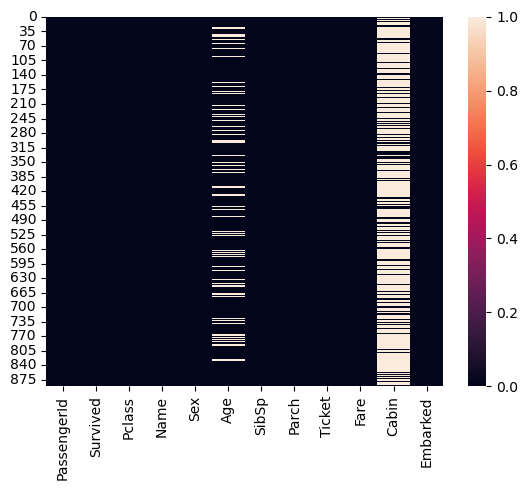

In [8]:
sns.heatmap(data_train.isnull())

# In Cabin column most of them are null Values
# if we impute the null values it will effect the distribution

In [10]:
data_train.drop(columns=["Cabin"],inplace=True)
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [11]:
# imputating Age and Embarked Column
data_train.Embarked.nunique()

3

In [12]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [13]:
data_train['Age']=data_train['Age'].fillna(data_train['Age'].median())
data_train["Embarked"]=data_train["Embarked"].fillna(data_train["Embarked"].mode().iloc[0])
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Drop the Name and Passenger Id Column

In [15]:
data_train.drop(columns=["PassengerId","Name","Ticket"],inplace=True)
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [16]:
data_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Visualizations

Survived
0    549
1    342
Name: count, dtype: int64

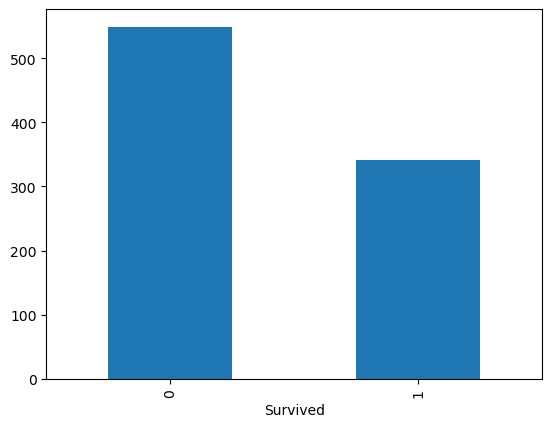

In [18]:
data_train['Survived'].value_counts().plot(kind="bar")
data_train["Survived"].value_counts()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

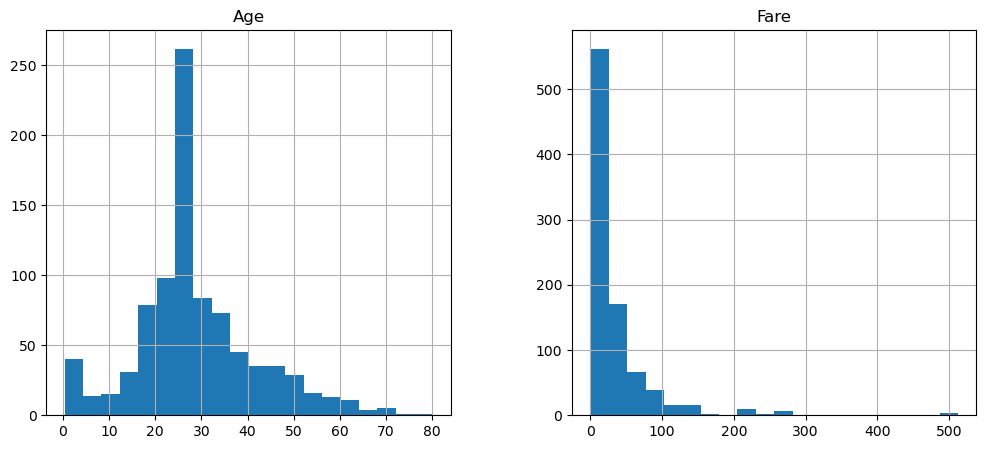

In [19]:
data_train.select_dtypes("float64").hist(figsize=(12,5),bins=20)

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64


<Axes: xlabel='Sex,Survived'>

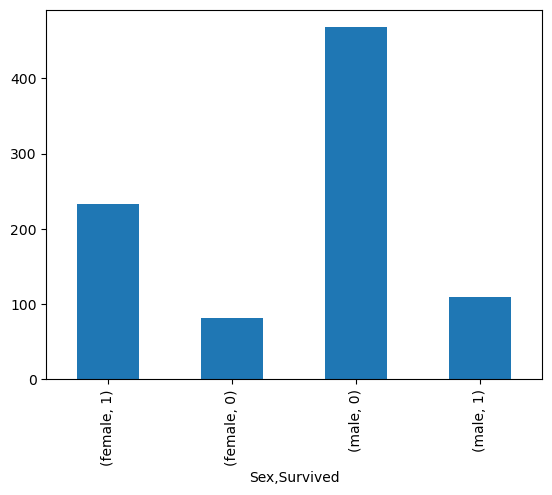

In [20]:
print(data_train.groupby("Sex")["Survived"].value_counts())
data_train.groupby("Sex")["Survived"].value_counts().plot(kind="bar")

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           219
Name: count, dtype: int64


<Axes: xlabel='Embarked,Survived'>

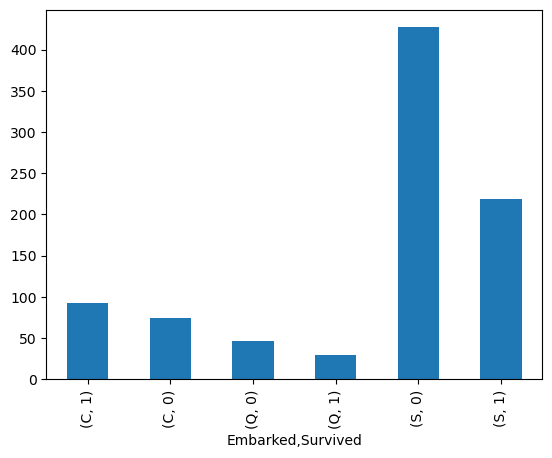

In [21]:
print(data_train.groupby("Embarked")["Survived"].value_counts())
data_train.groupby("Embarked")["Survived"].value_counts().plot(kind="bar")

# NO null values

# Categorical column to one hot encoder

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data_train["Sex"]=label_encoder.fit_transform(data_train["Sex"])
data_train["Embarked"]=label_encoder.fit_transform(data_train["Embarked"])
data_train


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


# For Sex Column
# 0- Female
# 1- Male

# For Embarked Column
# 0-C
# 1-Q
# 2-S

# Divide the data into X and Y

In [27]:
X=data_train.iloc[:,1:]
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [28]:
Y=data_train.iloc[:,0]
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Test Data

In [30]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Data Exploration

In [32]:
data_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [33]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [34]:
data_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Nan Rows

In [36]:
data_test[data_test.isnull().any(axis=1)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<Axes: >

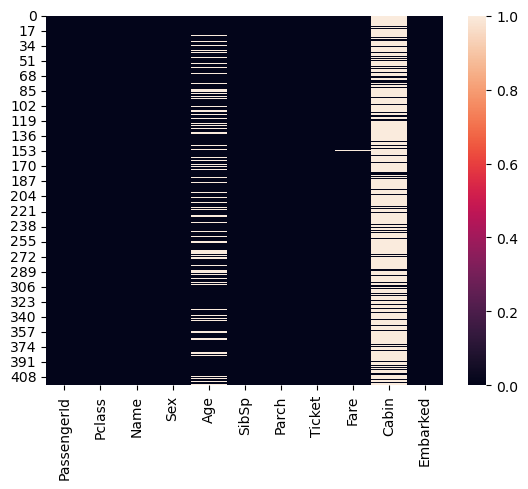

In [37]:
sns.heatmap(data_test.isnull())

In Cabin column most of them are null Values
if we impute the null values it will effect the distribution

In [39]:
data_test.drop(columns=["Cabin"],inplace=True)
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [40]:
data_test.Embarked.nunique()

3

In [41]:
data_test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [42]:
data_test['Age']=data_test['Age'].fillna(data_test['Age'].median())
data_test["Embarked"]=data_test["Embarked"].fillna(data_test["Embarked"].mode().iloc[0])
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


# Drop the Name and Passenger Id Column

In [44]:
data_test.drop(columns=["PassengerId","Name","Ticket"],inplace=True)
data_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,27.0,0,0,8.0500,S


In [45]:
data_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [46]:
data_test.dropna(inplace=True)
print(data_test.isnull().sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


# no null values

# visualizations

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

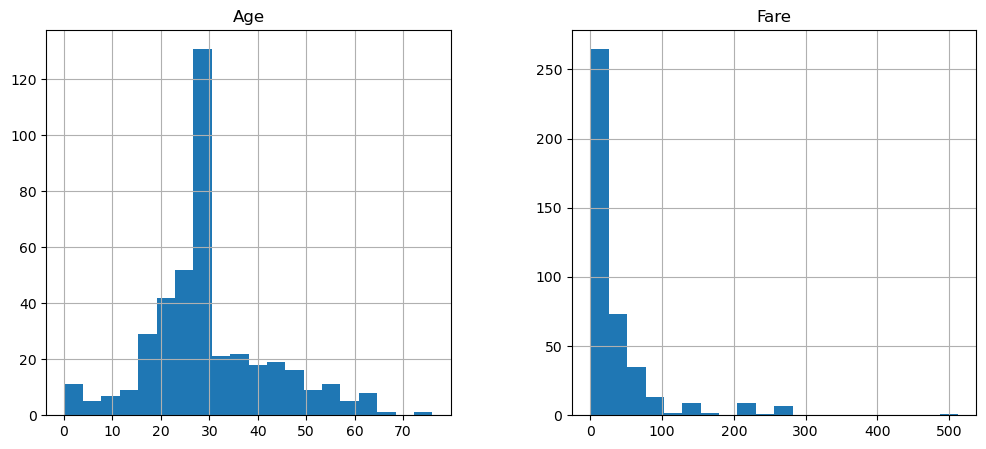

In [49]:
data_test.select_dtypes("float64").hist(figsize=(12,5),bins=20)

<Axes: xlabel='Sex'>

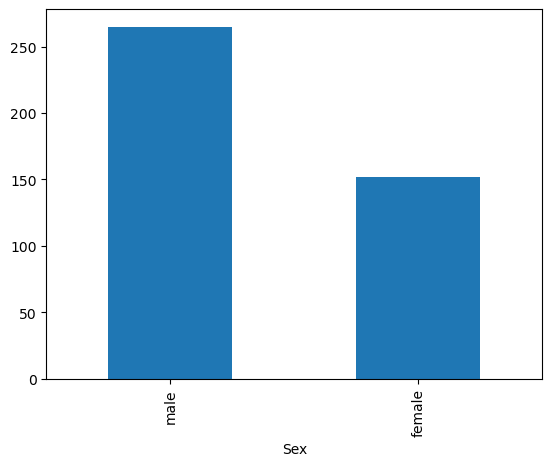

In [50]:
data_test['Sex'].value_counts().plot(kind="bar")

<Axes: xlabel='Parch'>

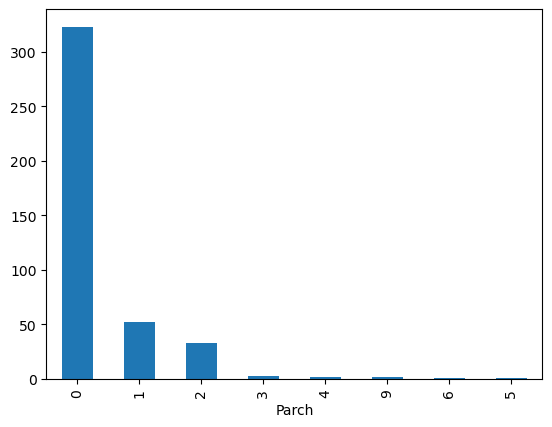

In [51]:
data_test['Parch'].value_counts().plot(kind="bar")

<Axes: xlabel='Embarked'>

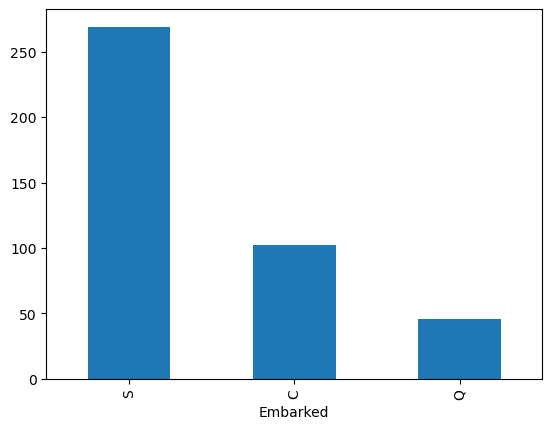

In [52]:
data_test['Embarked'].value_counts().plot(kind="bar")

<Axes: xlabel='SibSp'>

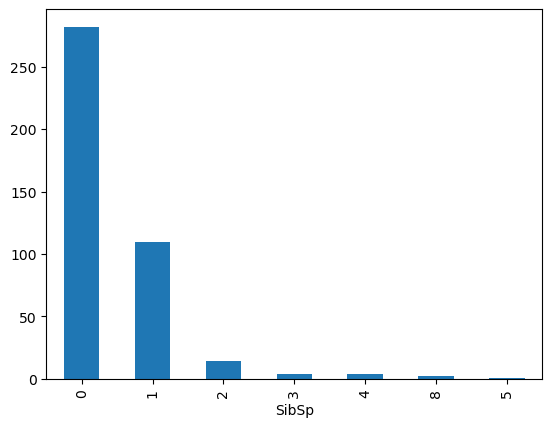

In [53]:
data_test['SibSp'].value_counts().plot(kind="bar")

# Categorical column to one hot encoder

In [55]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data_test["Sex"]=label_encoder.fit_transform(data_test["Sex"])
data_test["Embarked"]=label_encoder.fit_transform(data_test["Embarked"])
data_test


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,27.0,0,0,8.0500,2


In [56]:
data_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,27.0,0,0,8.0500,2


# it is used as test inputs for evaluating the model

# splitting the data into train and test split

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2 , random_state= 27)
print('X Train shape is:',X_train.shape)
print('X Test shape is:',X_test.shape)
print('Y Train shape is:',Y_train.shape)
print('Y Test shape is:',Y_test.shape)

X Train shape is: (712, 7)
X Test shape is: (179, 7)
Y Train shape is: (712,)
Y Test shape is: (179,)


In [60]:
model = LogisticRegression()                                                           #building our model

model.fit(X_train,Y_train) 

C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# model Evaluation

In [62]:
# for training data
pd.DataFrame(model.predict_proba(X_train))

,0,1
0,0.938368,0.061632
1,0.664009,0.335991
2,0.826516,0.173484
3,0.159157,0.840843
4,0.312250,0.687750
...,...,...
707,0.913480,0.086520
708,0.814975,0.185025
709,0.868070,0.131930
710,0.936301,0.063699


In [63]:
y_train_preds = model.predict(X_train)

y_train_preds

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [64]:
pd.DataFrame(y_train_preds)

,0
0,0
1,0
2,0
3,1
4,1
...,...
707,0
708,0
709,0
710,0


In [65]:
compare_train = pd.DataFrame({'Actual':Y_train,'Predicted':y_train_preds})

compare_train

,Actual,Predicted
129,0,0
515,0,0
148,0,0
345,1,1
458,1,1
...,...,...
824,0,0
543,1,0
840,0,0
696,0,0


In [66]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [67]:
#For training data confusion matrix is:

print(confusion_matrix(y_train_preds , Y_train))

[[374  84]
 [ 63 191]]


In [68]:
#Classification report for training data is:

print(classification_report(y_train_preds , Y_train))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       458
           1       0.69      0.75      0.72       254

    accuracy                           0.79       712
   macro avg       0.78      0.78      0.78       712
weighted avg       0.80      0.79      0.80       712



# for testing data

In [70]:
pd.DataFrame(model.predict_proba(X_test))

,0,1
0,0.304962,0.695038
1,0.277675,0.722325
2,0.419738,0.580262
3,0.187929,0.812071
4,0.874761,0.125239
...,...,...
174,0.904701,0.095299
175,0.185286,0.814714
176,0.881766,0.118234
177,0.586756,0.413244


In [71]:
y_test_preds = model.predict(X_test)

y_test_preds

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0], dtype=int64)

In [72]:
pd.DataFrame(y_test_preds)

,0
0,1
1,1
2,1
3,1
4,0
...,...
174,0
175,1
176,0
177,0


In [73]:
compare_test = pd.DataFrame({'Actual':Y_test,'Predicted':y_test_preds})

compare_test

,Actual,Predicted
432,1,1
10,1,1
38,0,1
747,1,1
314,0,0
...,...,...
333,0,0
247,1,1
718,0,0
229,0,0


In [74]:
#For testing data confusion matrix is:

print(confusion_matrix(y_test_preds , Y_test))

[[98 18]
 [14 49]]


In [75]:
#Classification report for testing data

print(classification_report(y_test_preds , Y_test))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       116
           1       0.73      0.78      0.75        63

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



# Test Accuracy is greater than Train Accuracy,so model is good model
# we can build the model with entire data

# Building the Model with Entire Data

In [78]:
logistic=LogisticRegression()
logistic.fit(X,Y)

C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [79]:
pd.DataFrame(logistic.predict_proba(X))

,0,1
0,0.907447,0.092553
1,0.082736,0.917264
2,0.374463,0.625537
3,0.113763,0.886237
4,0.921266,0.078734
...,...,...
886,0.749246,0.250754
887,0.050820,0.949180
888,0.503766,0.496234
889,0.387458,0.612542


In [80]:
y_pred=logistic.predict(X)
pd.DataFrame(logistic.predict(X))

,0
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [81]:
df=pd.DataFrame({"Actual":Y,"Predicted":y_pred})
df

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
886,0,0
887,1,1
888,0,0
889,1,1


In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y,y_pred)
confusion_matrix

array([[474,  75],
       [103, 239]], dtype=int64)

# correct Predictions
# 474 cases,we have correct predictions 0 has predicted as 0
# 239 cases,we have correct predictions 1 has predicted as 1
# Mis-Prediction
# 75 cases, 0 has predicted as 1
# 103 cases, 1 has predicted as 0

In [84]:
from sklearn.metrics import classification_report
report=classification_report(Y,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



In [85]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [86]:
area=roc_auc_score(Y,y_pred)
area

0.7811091937494007

In [87]:
fpr,tpr,thresholds=roc_curve(Y,logistic.predict_proba(X)[:,1])

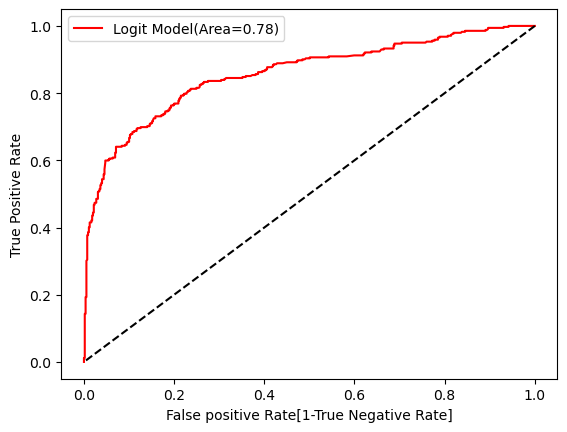

In [88]:
plt.plot(fpr,tpr,color="red",label="Logit Model(Area=%0.2f)"%area)
plt.plot([1,0],[1,0],"k--")
plt.xlabel("False positive Rate[1-True Negative Rate]")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [89]:
fpr=round(pd.Series(fpr),3)
tpr=round(pd.Series(tpr),3)
cutoff=round(pd.Series(thresholds),3)

In [90]:
table=pd.DataFrame({"FPR":fpr,"TPR":tpr,
                   "Cutoff":cutoff})
table

,FPR,TPR,Cutoff
0,0.000,0.000,inf
1,0.000,0.003,0.978
2,0.000,0.012,0.967
3,0.002,0.012,0.966
4,0.002,0.018,0.964
...,...,...,...
304,0.931,0.997,0.057
305,0.942,0.997,0.056
306,0.942,1.000,0.055
307,0.993,1.000,0.019


In [91]:
table.loc[(table.FPR>=0.18) & (table.TPR>=0.75)]

,FPR,TPR,Cutoff
118,0.189,0.754,0.411
119,0.191,0.754,0.398
120,0.191,0.757,0.397
121,0.193,0.757,0.395
122,0.193,0.763,0.380
...,...,...,...
304,0.931,0.997,0.057
305,0.942,0.997,0.056
306,0.942,1.000,0.055
307,0.993,1.000,0.019


In [92]:
prob=logistic.predict_proba(X)[:,1]
y_newpred=[]
for i in prob:
    if i>=0.389:
        y_newpred.append(1)
    else:
        y_newpred.append(0)

y_newpred
new_df=pd.DataFrame({"Actual":Y,"Newpredicted":y_newpred})
new_df.head()

,Actual,Newpredicted
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0


In [93]:
matrix=classification_report(Y,y_newpred)
print(matrix)

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       549
           1       0.71      0.76      0.73       342

    accuracy                           0.79       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891



In [94]:
import statsmodels.api as sm
sm.Logit(Y,X).fit().summary()

Optimization terminated successfully.
         Current function value: 0.495734
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Fri, 06 Sep 2024   Pseudo R-squ.:                  0.2556
Time:                        21:15:42   Log-Likelihood:                -441.70
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.640e-62
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass         0.0480      0.079      0.608      0.543      -0.107       0.203
Sex           -2.2772      0.179    -12.706      0.000      -2.628      -1.926
Age            0.0047      0.006      0.813      0.416      -0.007       0.016
SibSp         -0.2944      0.095     -3.099      0.002      -0.481      -0.108
Parch         -0.1172      0.112     -1.051      0.293      -0.336       0.101
Fare           0.0184      0.003      6.070      0.000       0.012       0.024
Embarked       0.1203      0.106      1.139      0.255      -0.087       0.327
==============================================================================
"""

# deployment

In [96]:
import pickle
filename="deploy.pkl"
pickle.dump(logistic,open(filename,'wb'))

# Interview Questions

## 1. What is the difference between precision and recall?
Precision and Recall are two important metrics used in evaluating the performance of classification models, particularly in the context of imbalanced datasets.

## Precision:
Precision measures the accuracy of a model’s positive predictions by focusing on how many of the predicted positives are actually correct. High precision indicates fewer false positives

## Recall:
Recall measures the model’s ability to identify actual positives by focusing on how many of the true positives are correctly identified. High recall means fewer false negatives.
​


##  2. What is cross-validation, and why is it important in binary classification?
Cross-validation is essential in binary classification to ensure that the model isn’t just performing well on a specific data split but generalizes to new data. By splitting the dataset into multiple parts, training on some, and validating on others, it helps detect overfitting and gives a more accurate measure of how well the model will perform in real-world scenarios. It's especially useful in small datasets or imbalanced classes, where a simple train-test split might not give a fair evaluation. Techniques like k-fold or stratified cross-validation further refine the process, ensuring consistency in results.